# Inference: using saved pipeline on a new data

<a href="https://mybinder.org/v2/gh/tinkoff-ai/etna/master?filepath=examples/inference.ipynb">
    <img src="https://mybinder.org/badge_logo.svg"  align='left'>
</a>

This notebook contains the example of usage already fitted and saved pipeline on a new data.

**Table of Contents**

* [Preparing data](#chapter1)
* [Fitting and saving pipeline](#chapter2)
    * [Fitting pipeline](#section_2_1)
    * [Saving pipeline](#section_2_2)
    * [Method `to_dict`](#section_2_2)
* [Using saved pipeline on a new data](#chapter3)
    * [Loading pipeline](#section_3_1)
    * [Forecast on a new data](#section_3_2)

In [1]:
import warnings

warnings.filterwarnings(action="ignore", message="Torchmetrics v0.9")
warnings.filterwarnings(action="ignore", message="`tsfresh` is not available")

In [2]:
import pathlib

HORIZON = 30
SAVE_DIR = pathlib.Path("tmp")
SAVE_DIR.mkdir(exist_ok=True)

## 1. Preparing data <a class="anchor" id="chapter1"></a>

Let's load data and prepare it for our pipeline.

In [3]:
import pandas as pd

In [4]:
df = pd.read_csv("data/example_dataset.csv")
df.head()

,timestamp,segment,target
0,2019-01-01,segment_a,170
1,2019-01-02,segment_a,243
2,2019-01-03,segment_a,267
3,2019-01-04,segment_a,287
4,2019-01-05,segment_a,279


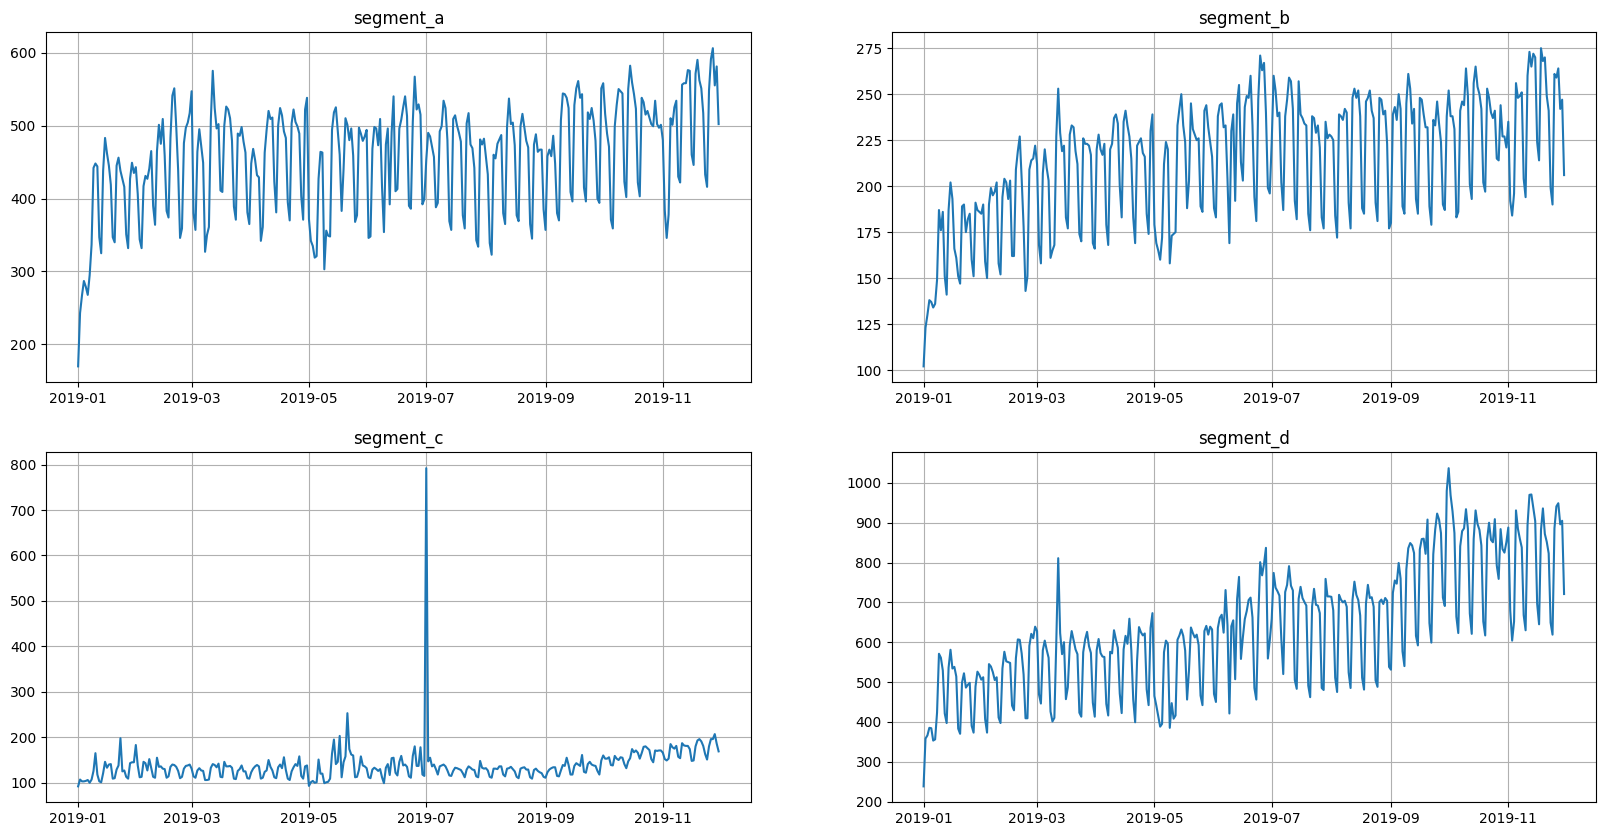

In [5]:
from etna.datasets import TSDataset

df = TSDataset.to_dataset(df)
ts = TSDataset(df, freq="D")
ts.plot()

We want to make two versions of data: old and new. New version should include more timestamps.

In [6]:
new_ts, test_ts = ts.train_test_split(test_size=HORIZON)
old_ts, _ = ts.train_test_split(test_size=HORIZON * 3)

Let's visualize them.

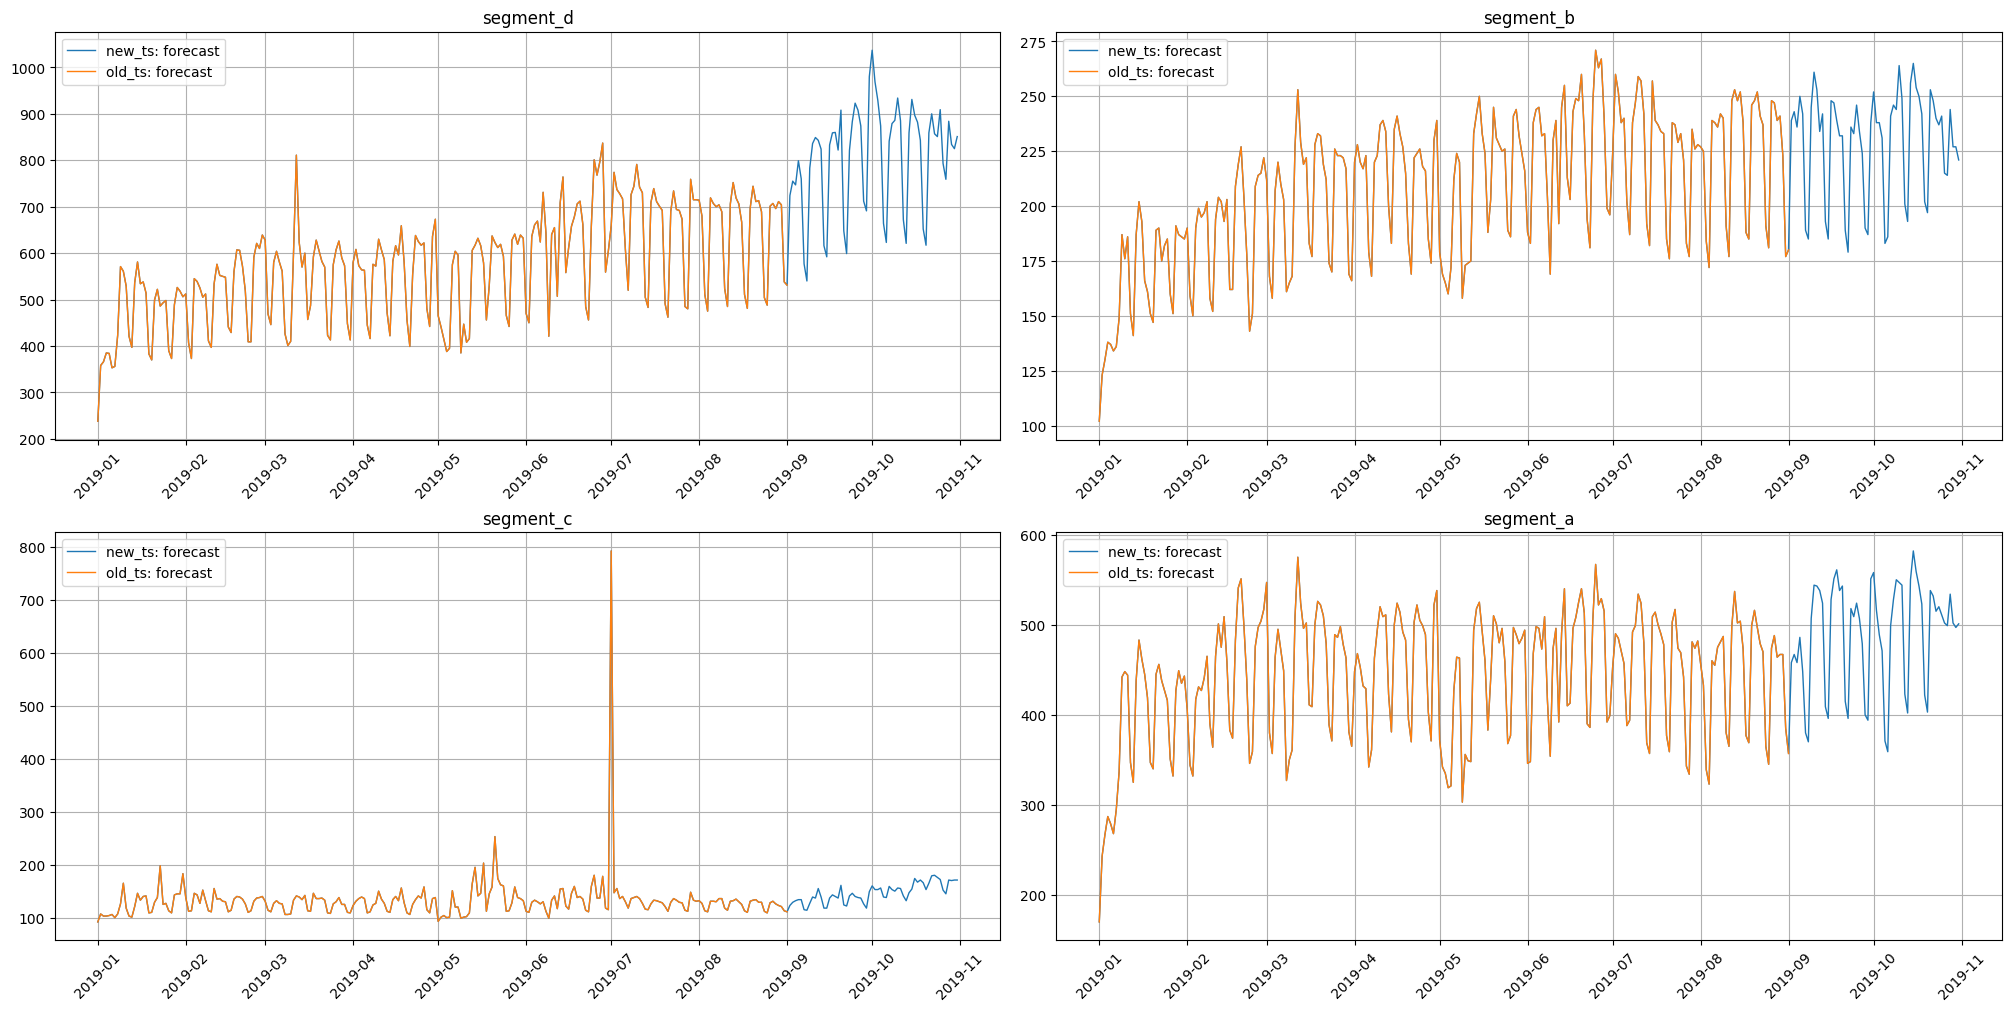

In [7]:
from etna.analysis import plot_forecast

plot_forecast(forecast_ts={"new_ts": new_ts, "old_ts": old_ts})

## 2. Fitting and saving pipeline <a class="anchor" id="chapter2"></a>

### 2.1 Fitting pipeline <a class="anchor" id="section_2_1"></a>

Here we fit our pipeline on `old_ts`.

In [8]:
from etna.transforms import (
    LagTransform,
    LogTransform,
    SegmentEncoderTransform,
    DateFlagsTransform,
)
from etna.pipeline import Pipeline
from etna.models.catboost import CatBoostMultiSegmentModel

log = LogTransform(in_column="target")
seg = SegmentEncoderTransform()
lags = LagTransform(in_column="target", lags=list(range(HORIZON, 96)), out_column="lag")
date_flags = DateFlagsTransform(
    day_number_in_week=True,
    day_number_in_month=True,
    month_number_in_year=True,
    is_weekend=False,
    out_column="date_flag",
)

model = CatBoostMultiSegmentModel()
transforms = [log, seg, lags, date_flags]
pipeline = Pipeline(model=model, transforms=transforms, horizon=HORIZON)

In [9]:
pipeline.fit(old_ts)

Pipeline(model = CatBoostMultiSegmentModel(iterations = None, depth = None, learning_rate = None, logging_level = 'Silent', l2_leaf_reg = None, thread_count = None, ), transforms = [LogTransform(in_column = 'target', base = 10, inplace = True, out_column = None, ), SegmentEncoderTransform(), LagTransform(in_column = 'target', lags = [30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95], out_column = 'lag', ), DateFlagsTransform(day_number_in_week = True, day_number_in_month = True, day_number_in_year = False, week_number_in_month = False, week_number_in_year = False, month_number_in_year = True, season_number = False, year_number = False, is_weekend = False, special_days_in_week = (), special_days_in_month = (), out_column = 'date_flag', )], horizon = 30, )

### 2.2 Saving pipeline <a class="anchor" id="section_2_2"></a>

Let's save ready pipeline to disk.

In [10]:
pipeline.save(SAVE_DIR / "pipeline.zip")

Currently, we can't save `TSDataset`. But model and transforms are successfully saved. We can also save models and transforms separately exactly like we saved our pipeline.

In [11]:
model.save(SAVE_DIR / "model.zip")
transforms[0].save(SAVE_DIR / "transform_0.zip")

In [12]:
!ls tmp

model.zip       pipeline.zip    transform_0.zip


### 2.3 Method `to_dict` <a class="anchor" id="section_2_3"></a>

Method `save` shouldn't be confused with method `to_dict`. The first is used to save object with its inner state to disk, e.g. fitted catboost model. The second is used to form a representation that can be used to recreate the object with the same initialization parameters.

In [13]:
pipeline.to_dict()

{'model': {'logging_level': 'Silent',
  'kwargs': {},
  '_target_': 'etna.models.catboost.CatBoostMultiSegmentModel'},
 'transforms': [{'in_column': 'target',
   'base': 10,
   'inplace': True,
   '_target_': 'etna.transforms.math.log.LogTransform'},
  {'_target_': 'etna.transforms.encoders.segment_encoder.SegmentEncoderTransform'},
  {'in_column': 'target',
   'lags': [30,
    31,
    32,
    33,
    34,
    35,
    36,
    37,
    38,
    39,
    40,
    41,
    42,
    43,
    44,
    45,
    46,
    47,
    48,
    49,
    50,
    51,
    52,
    53,
    54,
    55,
    56,
    57,
    58,
    59,
    60,
    61,
    62,
    63,
    64,
    65,
    66,
    67,
    68,
    69,
    70,
    71,
    72,
    73,
    74,
    75,
    76,
    77,
    78,
    79,
    80,
    81,
    82,
    83,
    84,
    85,
    86,
    87,
    88,
    89,
    90,
    91,
    92,
    93,
    94,
    95],
   'out_column': 'lag',
   '_target_': 'etna.transforms.math.lags.LagTransform'},
  {'day_number_in_we

In [14]:
model.to_dict()

{'logging_level': 'Silent',
 'kwargs': {},
 '_target_': 'etna.models.catboost.CatBoostMultiSegmentModel'}

In [15]:
transforms[0].to_dict()

{'in_column': 'target',
 'base': 10,
 'inplace': True,
 '_target_': 'etna.transforms.math.log.LogTransform'}

To recreate the object from generated dictionary we can use a `hydra_slayer` library.

In [16]:
from hydra_slayer import get_from_params

get_from_params(**transforms[0].to_dict())

LogTransform(in_column = 'target', base = 10, inplace = True, out_column = None, )

## 3. Using saved pipeline on a new data <a class="anchor" id="chapter3"></a>

### 3.1 Loading pipeline <a class="anchor" id="section_3_1"></a>

Let's load saved pipeline.

In [17]:
from etna.core import load

pipeline_loaded = load(SAVE_DIR / "pipeline.zip", ts=new_ts)
pipeline_loaded

Pipeline(model = CatBoostMultiSegmentModel(iterations = None, depth = None, learning_rate = None, logging_level = 'Silent', l2_leaf_reg = None, thread_count = None, ), transforms = [LogTransform(in_column = 'target', base = 10, inplace = True, out_column = None, ), SegmentEncoderTransform(), LagTransform(in_column = 'target', lags = [30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95], out_column = 'lag', ), DateFlagsTransform(day_number_in_week = True, day_number_in_month = True, day_number_in_year = False, week_number_in_month = False, week_number_in_year = False, month_number_in_year = True, season_number = False, year_number = False, is_weekend = False, special_days_in_week = (), special_days_in_month = (), out_column = 'date_flag', )], horizon = 30, )

Here we explicitly set `ts=new_ts` in `load` function in order to pass it inside our `pipeline_loaded`. Otherwise, `pipeline_loaded` doesn't have any `ts` to work with.

We can also load saved model and transoform using `load`, but we shouldn't set `ts` parameter, because models and transforms don't need it.

In [18]:
model_loaded = load(SAVE_DIR / "model.zip")
transform_0_loaded = load(SAVE_DIR / "transform_0.zip")

There is an alternative way to load objects using their `classmethod load`.

In [19]:
pipeline_loaded_from_class = Pipeline.load(SAVE_DIR / "pipeline.zip", ts=new_ts)
model_loaded_from_class = CatBoostMultiSegmentModel.load(SAVE_DIR / "model.zip")
transform_0_loaded_from_class = LogTransform.load(SAVE_DIR / "transform_0.zip")

### 3.2 Forecast on a new data <a class="anchor" id="section_3_2"></a>

Use this pipeline for prediction.

In [20]:
forecast_ts = pipeline_loaded.forecast()

Look at predictions.

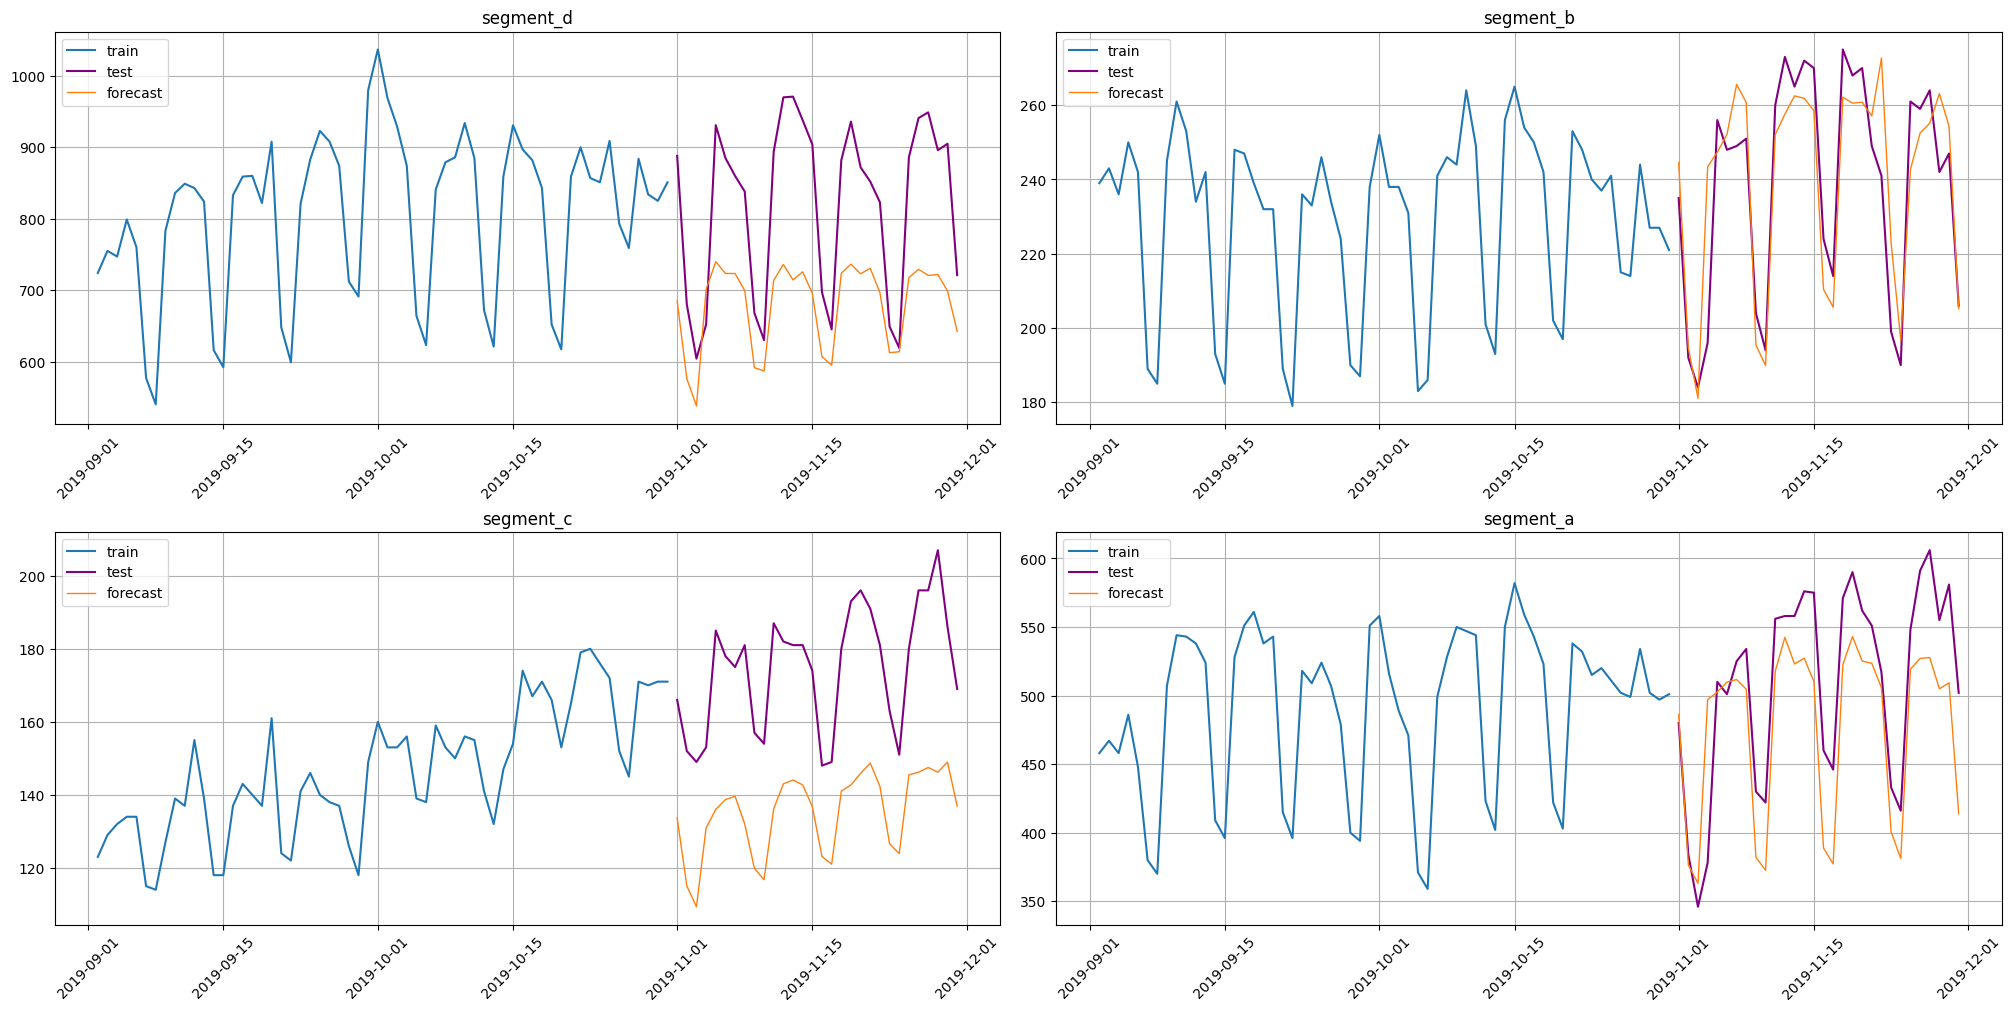

In [21]:
plot_forecast(forecast_ts=forecast_ts, test_ts=test_ts, train_ts=new_ts, n_train_samples=HORIZON * 2)

In [22]:
from etna.metrics import SMAPE

smape = SMAPE()
smape(y_true=test_ts, y_pred=forecast_ts)

{'segment_d': 18.20146757117957,
 'segment_b': 4.828671629496564,
 'segment_c': 25.23759225436336,
 'segment_a': 8.73107925541017}

Let's compare it with metrics of pipeline that was fitted on `new_ts`.

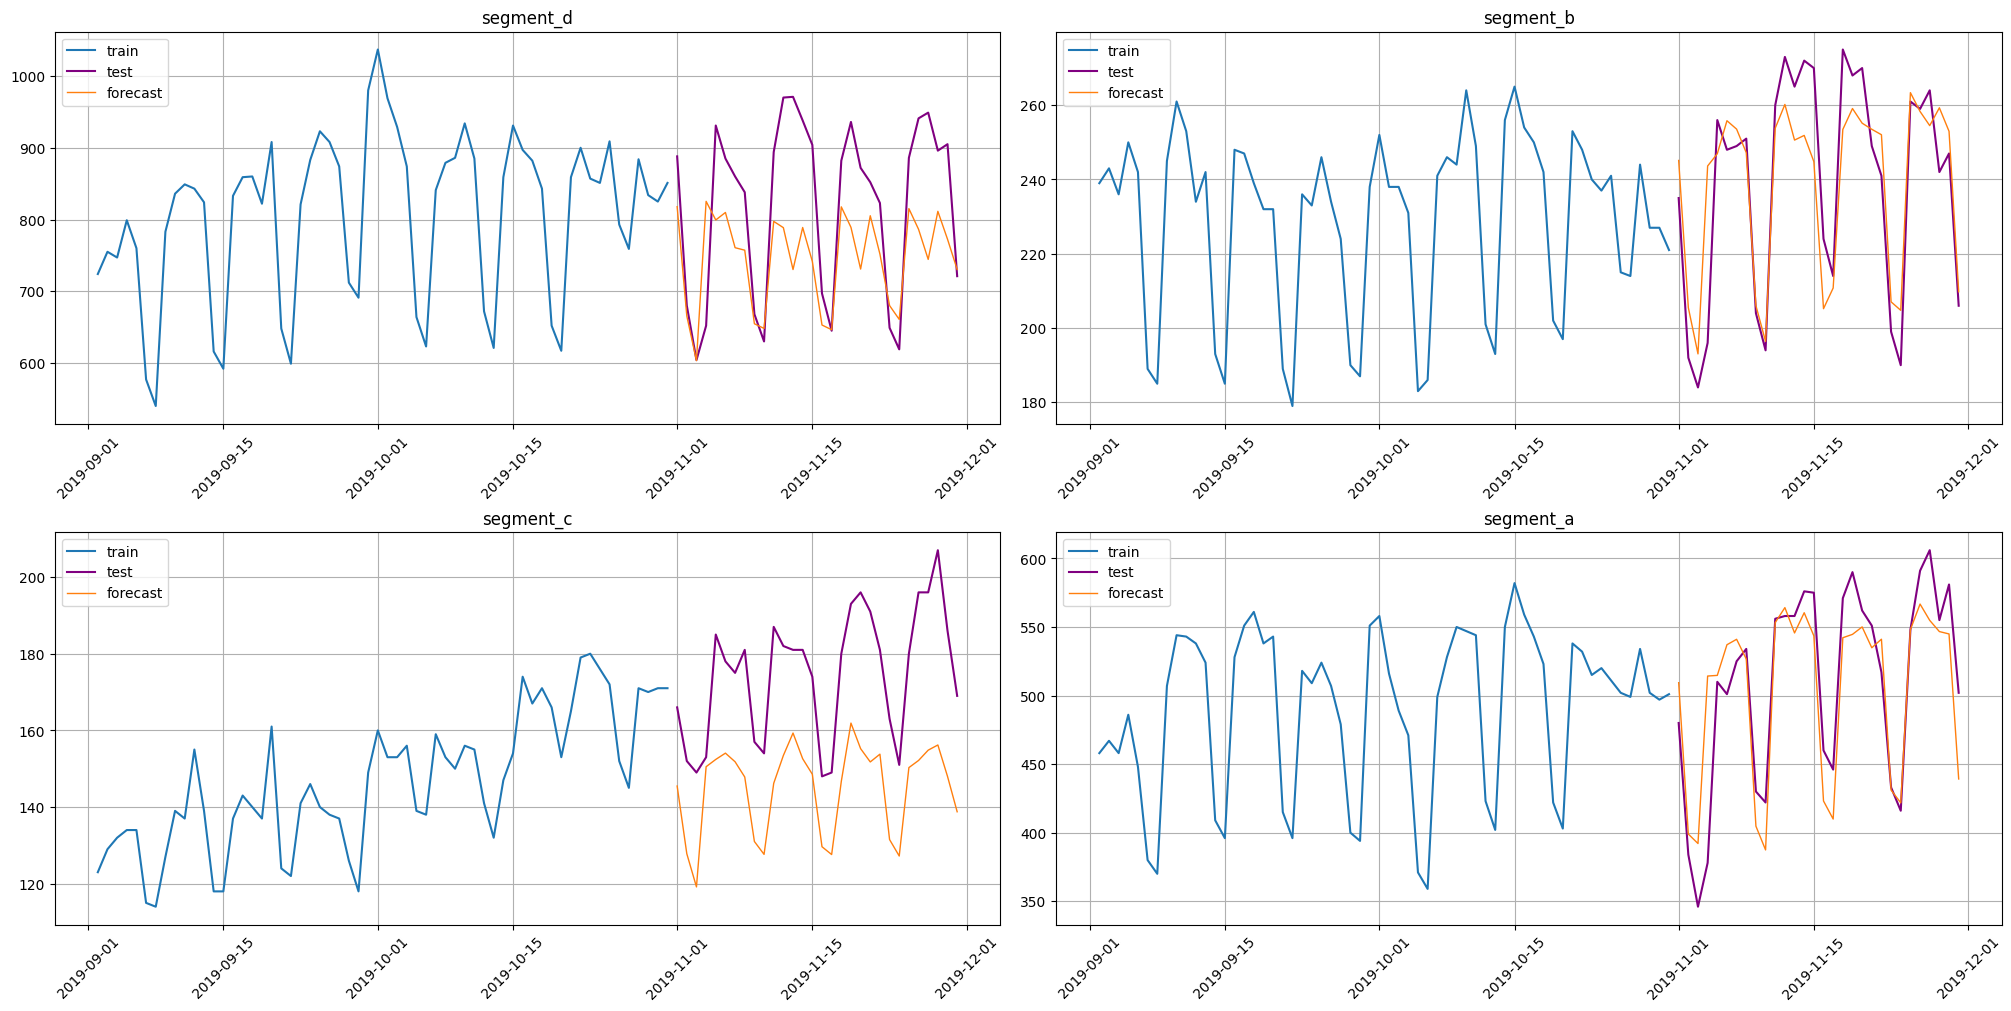

In [23]:
pipeline_loaded.fit(new_ts)
forecast_new_ts = pipeline_loaded.forecast()

plot_forecast(forecast_ts=forecast_new_ts, test_ts=test_ts, train_ts=new_ts, n_train_samples=HORIZON * 2)

In [24]:
smape(y_true=test_ts, y_pred=forecast_new_ts)

{'segment_d': 11.162075802124274,
 'segment_b': 4.703408652853966,
 'segment_c': 18.357231604941372,
 'segment_a': 5.587809488492237}

As we can see, these predictions are better. There are two main reasons:
1. Change of distribution. In a new data there can be some change of distribution that saved pipeline hasn't seen. In our case we can see a growth in segments `segment_c` and `segment_d` after the end of `old_ts`.
2. New pipeline has more data to learn.